# Student Information
Name: 黃宇加

Student ID: 110034011

GitHub ID: REX722

---

# First: Take Home Exercise

### Setup

In [9]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 

In [10]:
import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [11]:
# 篩選出1和3的category
X[X['category'].isin([1,3])]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2242,From: Sean McMains <mcmains@unt.edu> Subject: ...,1,comp.graphics
2246,From: lmvec@westminster.ac.uk (William Hargrea...,3,soc.religion.christian
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics


---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [12]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [13]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [14]:
# Answer here
'''
根據isnull()的document解釋：
isnull()只有在np.nan和None這兩個值的時候會map到True
其它像是F的這種''的空字串或np.inf都會是False，而C和D的例子都是字串，所以會回傳False
'''

"\n根據isnull()的document解釋：\nisnull()只有在np.nan和None這兩個值的時候會map到True\n其它像是F的這種''的空字串或np.inf都會是False，而C和D的例子都是字串，所以會回傳False\n"

---

### Setup

In [15]:
X_sample = X.sample(n=1000, random_state = 42) #random state

### **>>> Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [16]:
X['category'].value_counts(normalize=True) * 100

3    26.539654
2    26.318121
1    25.875055
0    21.267169
Name: category, dtype: float64

In [17]:
X_sample['category'].value_counts(normalize=True) * 100

2    27.7
3    27.0
1    24.7
0    20.6
Name: category, dtype: float64

In [18]:
# Answer here
''' 
1. rows從2257變成1000
2. X_sample的index是亂的，沒有照順序
3. category(category_name)每種的比例改變，在X中3類比2類多，而X_sample的3類比2類少
''' 

' \n1. rows從2257變成1000\n2. X_sample的index是亂的，沒有照順序\n3. category(category_name)每種的比例改變，在X中3類比2類多，而X_sample的3類比2類少\n'

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'X':X.category_name.value_counts(), 
                   'X_sample': X_sample.category_name.value_counts()})
df.sort_values(by = 'X', ascending = False, inplace = True)
df

,X,X_sample
soc.religion.christian,599,270
sci.med,594,277
comp.graphics,584,247
alt.atheism,480,206


<Axes: title={'center': 'Category distribution'}>

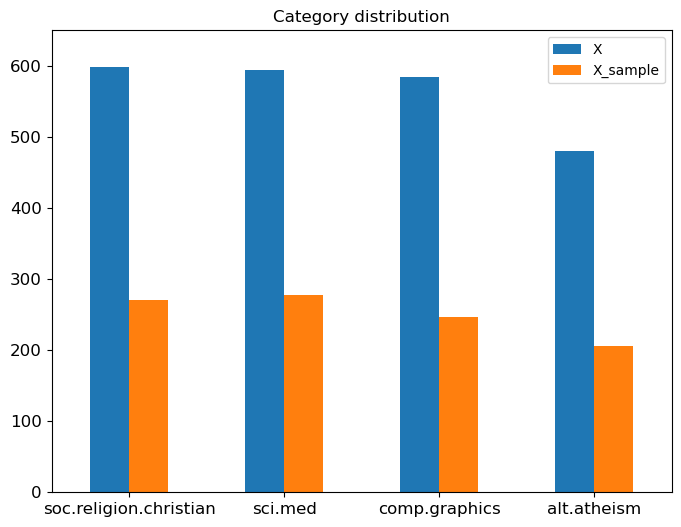

In [20]:
df.plot(kind='bar',
       title='Category distribution',
       ylim=(0,650),
       rot = 0, 
       fontsize = 12, 
       figsize = (8,6))

---

### Setup

In [21]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [22]:
# Answer here
'''
This shows the two terms show in the fourth document
'''
count_vect.get_feature_names_out()[np.where(X_counts[0:5, 0:100].toarray()[4] == 1)]

array(['00', '01'], dtype=object)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

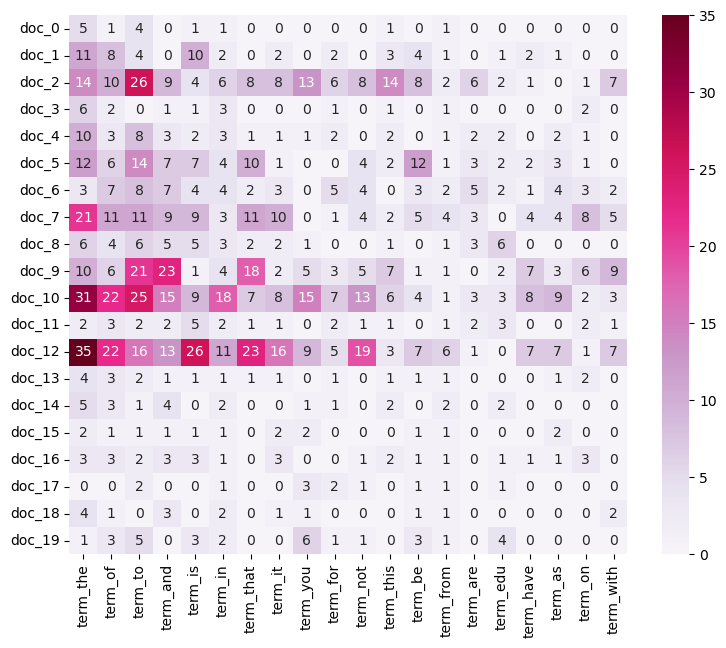

In [23]:
# Answer here
import seaborn as sns
top_20_frequence_terms_index = np.argsort(-np.asarray(X_counts.sum(axis=0))[0])[0:20] # 先找出前20多出現次數的index
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_20_frequence_terms_index]] # 利用前面找出的index找出那些字
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]] # 看前面20個document
plot_z = X_counts[0:20, top_20_frequence_terms_index].toarray() # 找出前20個document出現整個文件前20多出現次數的字的次數

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                annot=True)

---

### Setup

In [24]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [25]:
# Answer here
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [26]:
# 創建一個dataframe並篩選出現次數>3的term
df = pd.DataFrame(data={
    'terms': count_vect.get_feature_names_out()[:300],
    'frequencies': term_frequencies[:300]
})
df= df[df['frequencies'] > 3]

In [27]:
fig = px.bar(df, x = 'terms', y = 'frequencies')
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [28]:
# 利用 Exercise13 的dataframe排序
df.sort_values(by = 'frequencies', ascending = False, inplace = True)

In [29]:
fig = px.bar(df, x = 'terms', y = 'frequencies')
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

---

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [30]:
# 因為plotly可以直接用 loy_y 將y值轉成log，所以延續使用Exercise13的dataframe
fig = px.bar(df, x = 'terms', y = 'frequencies', log_y = True)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()
'''
1. 利用出現的次數來排序可以比較容易看出高低關係，不像前一個圖中比較難比較數量的多寡
2. 將次數取log後，可以比較容易看出後段微小的差異，在Exercise 14中幾乎難以找出後段不同數量的斷點
3. 另外，原本第一個字與後面的字出現次數差距很大，取完log後，有變得比較平滑一些
'''

'\n1. 利用出現的次數來排序可以比較容易看出高低關係，不像前一個圖中比較難比較數量的多寡\n2. 將次數取log後，可以比較容易看出後段微小的差異，在Exercise 14中幾乎難以找出後段不同數量的斷點\n3. 另外，原本第一個字與後面的字出現次數差距很大，取完log後，有變得比較平滑一些\n'

---

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [31]:
# Answer here
'''
1. 在每一個category中，出現次數前5多的大概都是the of to is and that，所以這些字可能對於後續分類category沒有幫助
2. 在 sci.med的後1%中，出現蠻多類似症狀或是藥物或化學相關的醫學專有名詞，後續利用這些字在分類時可能會分得還不錯
3. 在 comp.graphics前5%中，有出現computer, animation, model, performance等相關用字，與其它三種的主題差蠻多的
4. 在 alt.atheism的後1%中，出現蠻多反面或負面的字眼
5. 在 soc.religion.christian的後1%中，有出現一些比較特殊的宗教字眼，像是extrascriptural, ezekiel, ressurrections等等
6. 總而言之，在前面5%的字中，比較多常見的字，對於分類來說可能沒什麼幫助，所以可以利用後1%的字，比較會有一些與主題相關且特殊的字
'''


'\n1. 在每一個category中，出現次數前5多的大概都是the of to is and that，所以這些字可能對於後續分類category沒有幫助\n2. 在 sci.med的後1%中，出現蠻多類似症狀或是藥物或化學相關的醫學專有名詞，後續利用這些字在分類時可能會分得還不錯\n3. 在 comp.graphics前5%中，有出現computer, animation, model, performance等相關用字，與其它三種的主題差蠻多的\n4. 在 alt.atheism的後1%中，出現蠻多反面或負面的字眼\n5. 在 soc.religion.christian的後1%中，有出現一些比較特殊的宗教字眼，像是extrascriptural, ezekiel, ressurrections等等\n6. 總而言之，在前面5%的字中，比較多常見的字，對於分類來說可能沒什麼幫助，所以可以利用後1%的字，比較會有一些與主題相關且特殊的字\n'

---

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance. For this you can find the following google collabs for reference provided by their github repository here: [FAE Top-K](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/topk/FAE.ipynb) and [MaxFPGrowth](https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/frequentPattern/maximal/MaxFPGrowth.ipynb)

In [32]:
result = pd.DataFrame(columns=['Algorithm', 'minSup/kCount', 'Total No of patterns', 'Runtime'])

#### FPGrowth

In [33]:
from PAMI.frequentPattern.basic import FPGrowth
minSup = 9

obj = FPGrowth.FPGrowth(iFile='../td_freq_db_comp_graphics.csv', minSup = minSup)
obj.mine()

result.loc[result.shape[0]] = ['FPGrowth', minSup, len(obj.getPatterns()), obj.getRuntime()]

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


#### FAE Top-K

In [34]:
from PAMI.frequentPattern.topk import FAE

kCountList = [500, 1000, 1500]
for kCount in kCountList:
    obj2 = FAE.FAE(iFile = '../td_freq_db_comp_graphics.csv', k = kCount, sep = '\t')
    obj2.mine()

    result.loc[result.shape[0]] = ['FAE Top-K', kCount, len(obj2.getPatterns()), obj2.getRuntime()]

 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.


#### MaxFPGrowth

In [35]:
from PAMI.frequentPattern.maximal import MaxFPGrowth

minimumSupportCountList = [3, 6, 9]

for minSupCount in minimumSupportCountList:
    obj3 = MaxFPGrowth.MaxFPGrowth('../td_freq_db_comp_graphics.csv', minSup = minSupCount, sep='\t')
    obj3.mine()

    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj3.getPatterns()), obj3.getRuntime()]

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 


In [36]:
result

,Algorithm,minSup/kCount,Total No of patterns,Runtime
0,FPGrowth,9,33574,0.162047
1,FAE Top-K,500,500,0.892815
2,FAE Top-K,1000,1000,2.281360
3,FAE Top-K,1500,1500,4.206802
4,MaxFPGrowth,3,6872,18.727588
5,MaxFPGrowth,6,1340,0.275136
6,MaxFPGrowth,9,660,0.118033


In [210]:
'''
1. 從FPGrowth和MaxFPGrowth的結果來看，在同樣將minSup設成9時，FPGrowth出現的pattern數量比MaxFPGrowth來得多，且執行時間較短
2. FAE Top-K 設定的kCount越多，執行時間就越長
3. 在設定不同minSup的MaxFPGrowth中，當minSup越高，pattern的數量就越少，且執行時間越短
'''

'\n1. 從FPGrowth和MaxFPGrowth的結果來看，在同樣將minSup設成9時，FPGrowth出現的pattern數量比MaxFPGrowth來得多，且執行時間較短\n2. FAE Top-K 設定的kCount越多，執行時間就越長\n3. 在設定不同minSup的MaxFPGrowth中，當minSup越高，pattern的數量就越少，且執行時間越短\n'

---

### Setup

In [37]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9

In [38]:
obj1 = alg.FPGrowth(iFile='../td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()

obj2 = alg.FPGrowth(iFile='../td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()

obj3 = alg.FPGrowth(iFile='../td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()

obj4 = alg.FPGrowth(iFile='../td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


In [39]:
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

total_patterns_count = sum(len(df) for df in dfs)

discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])
terms = count_vect.get_feature_names_out() 

X['tokenized_text'] = X['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

In [215]:
# 在產生pattern_matrix的DataFrame有做一些修改，讓速度變快
pattern_matrix = pd.DataFrame(
    {
        pattern: X['tokenized_text'].apply(lambda x: int(pattern_words.issubset(x)))
        for pattern in final_pattern_df['Patterns']
        for pattern_words in [set(pattern.split())]
    }
)

In [216]:
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [225]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
X_pca_aug = PCA(n_components = 3, random_state = 42).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components = 3, random_state = 42).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components = 3, random_state = 42).fit_transform(augmented_df.values)

c:\Users\Rex\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [226]:
from mpl_toolkits.mplot3d import Axes3D 

col = ['red', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

def plot_3d_scatter(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    
    ax.view_init(elev=elev, azim=azim)

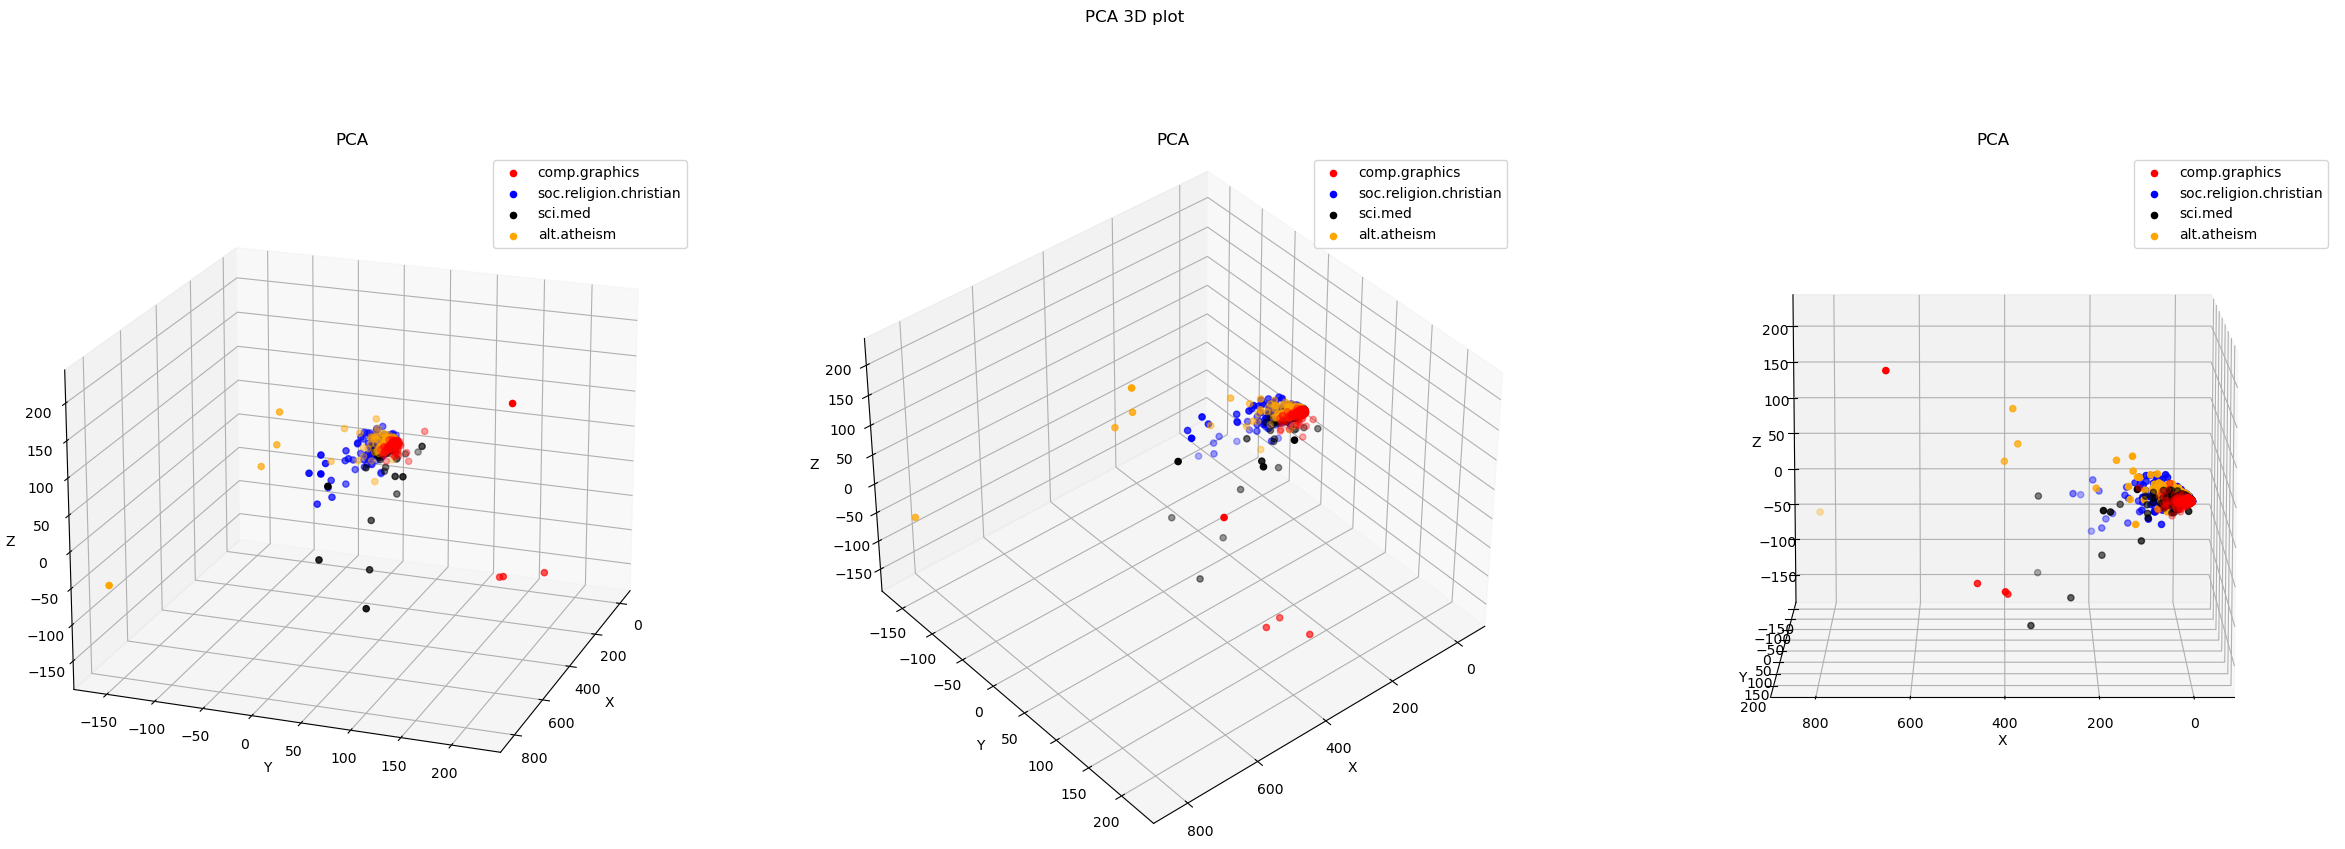

In [227]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('PCA 3D plot')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA', elev=20, azim=20)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_pca_aug, 'PCA', elev=40, azim=50)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_pca_aug, 'PCA', elev=10, azim=90)

plt.show()

In [220]:
'''
1. 在PCA的圖中，並沒有看到明顯的分割點，且資料大部分都集中在同一個地方，僅有一些outlier
2. soc.religion.christian的種類的點相較其它三種較為集中，沒有明顯的outlier
'''

'\n1. 在PCA的圖中，並沒有看到明顯的分割點，且資料大部分都集中在同一個地方，僅有一些outlier\n2. soc.religion.christian的種類的點相較其它三種較為集中，沒有明顯的outlier\n'

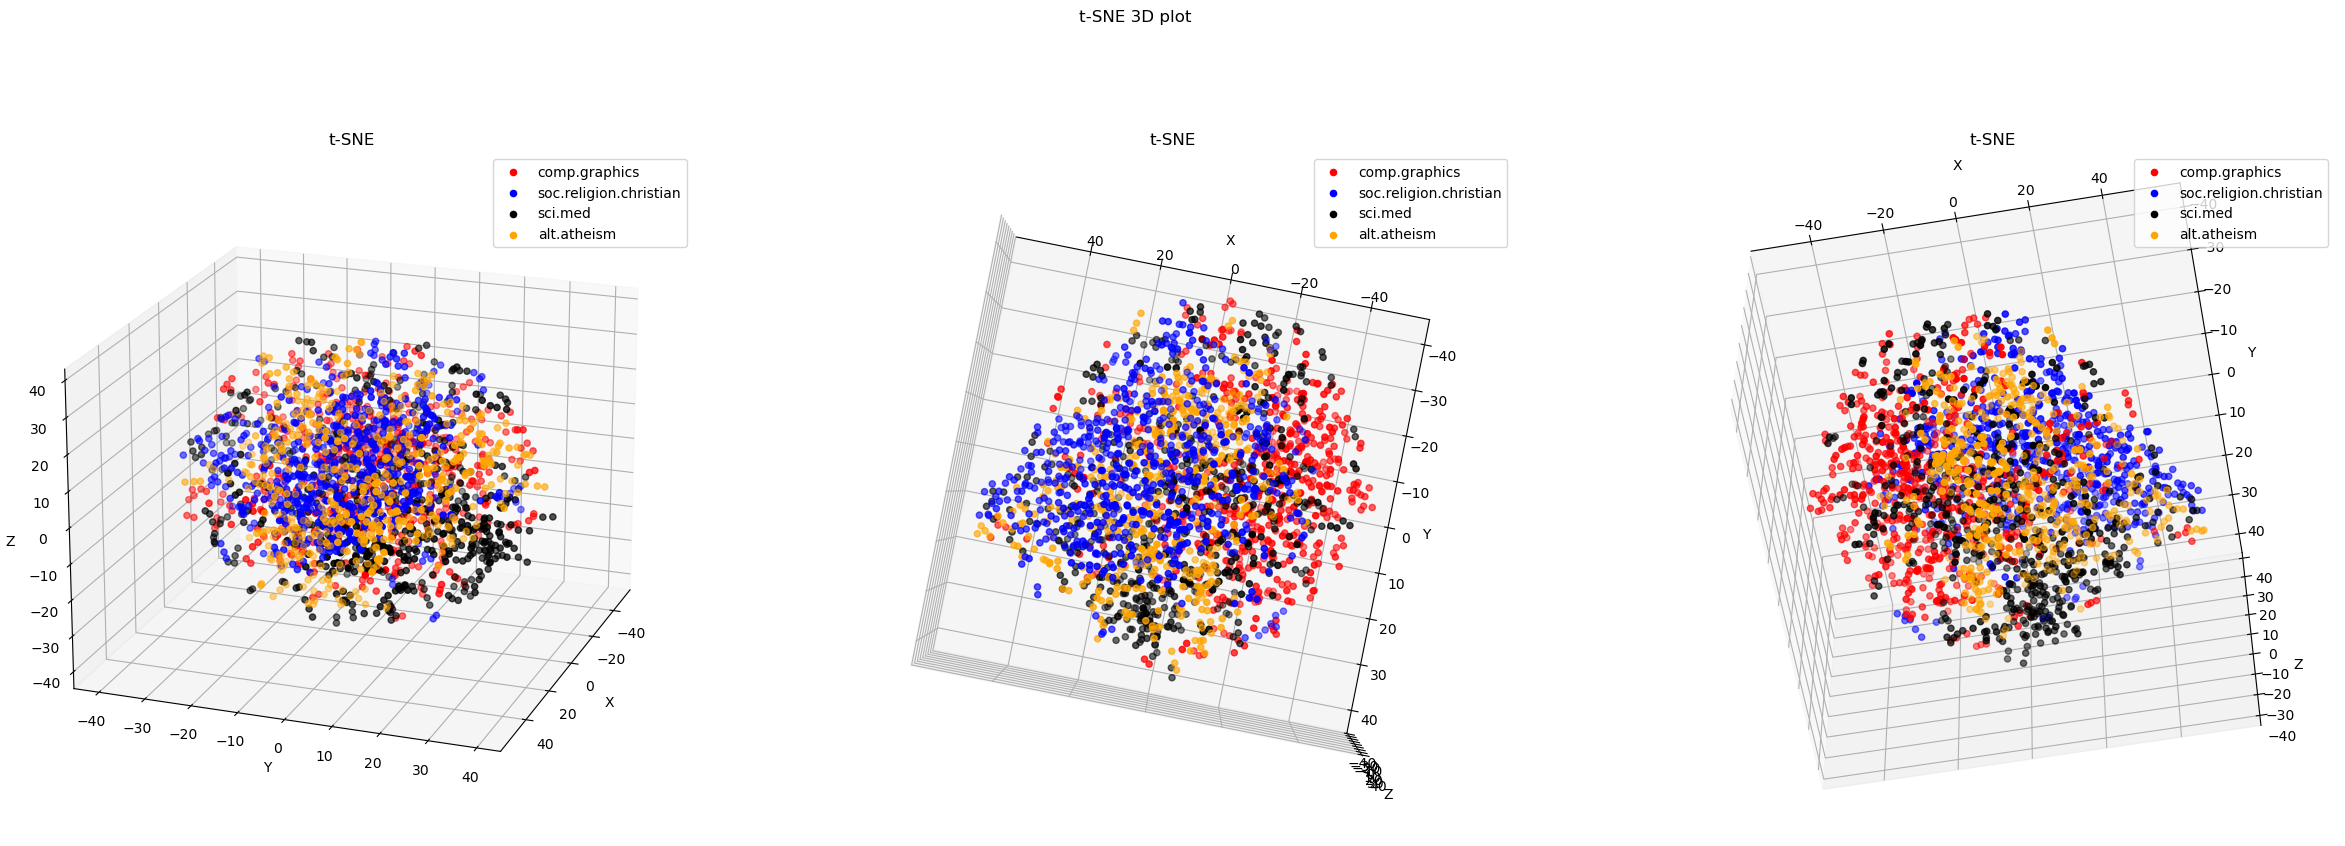

In [251]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('t-SNE 3D plot')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_tsne_aug, 't-SNE', elev=20, azim=20)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE', elev=90, azim=100)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_tsne_aug, 't-SNE', elev=-60, azim=280)

plt.show()

In [222]:
'''
1. 在t-SNE的圖與PCA一樣沒有明顯的分割點，但分布不像PCA來的集中，點密度較低
2. 在中間的角度可以稍微看出來soc.religion.christian(藍色)和comp.graphics(紅色)的界線
3. 在右邊的角度也可以稍微看出comp.graphics(紅色)和alt.atheism(橘色)的界線
'''

'\n1. 在t-SNE的圖與PCA一樣沒有明顯的分割點，但分布不像PCA來的集中，點密度較低\n2. 在中間的角度可以稍微看出來comp.graphics(珊瑚紅)和alt.atheism(橘色)的界線\n3. 在右邊的角度也可以稍微看出soc.religion.christian(藍色)和comp.graphics(珊瑚紅)的界線\n'

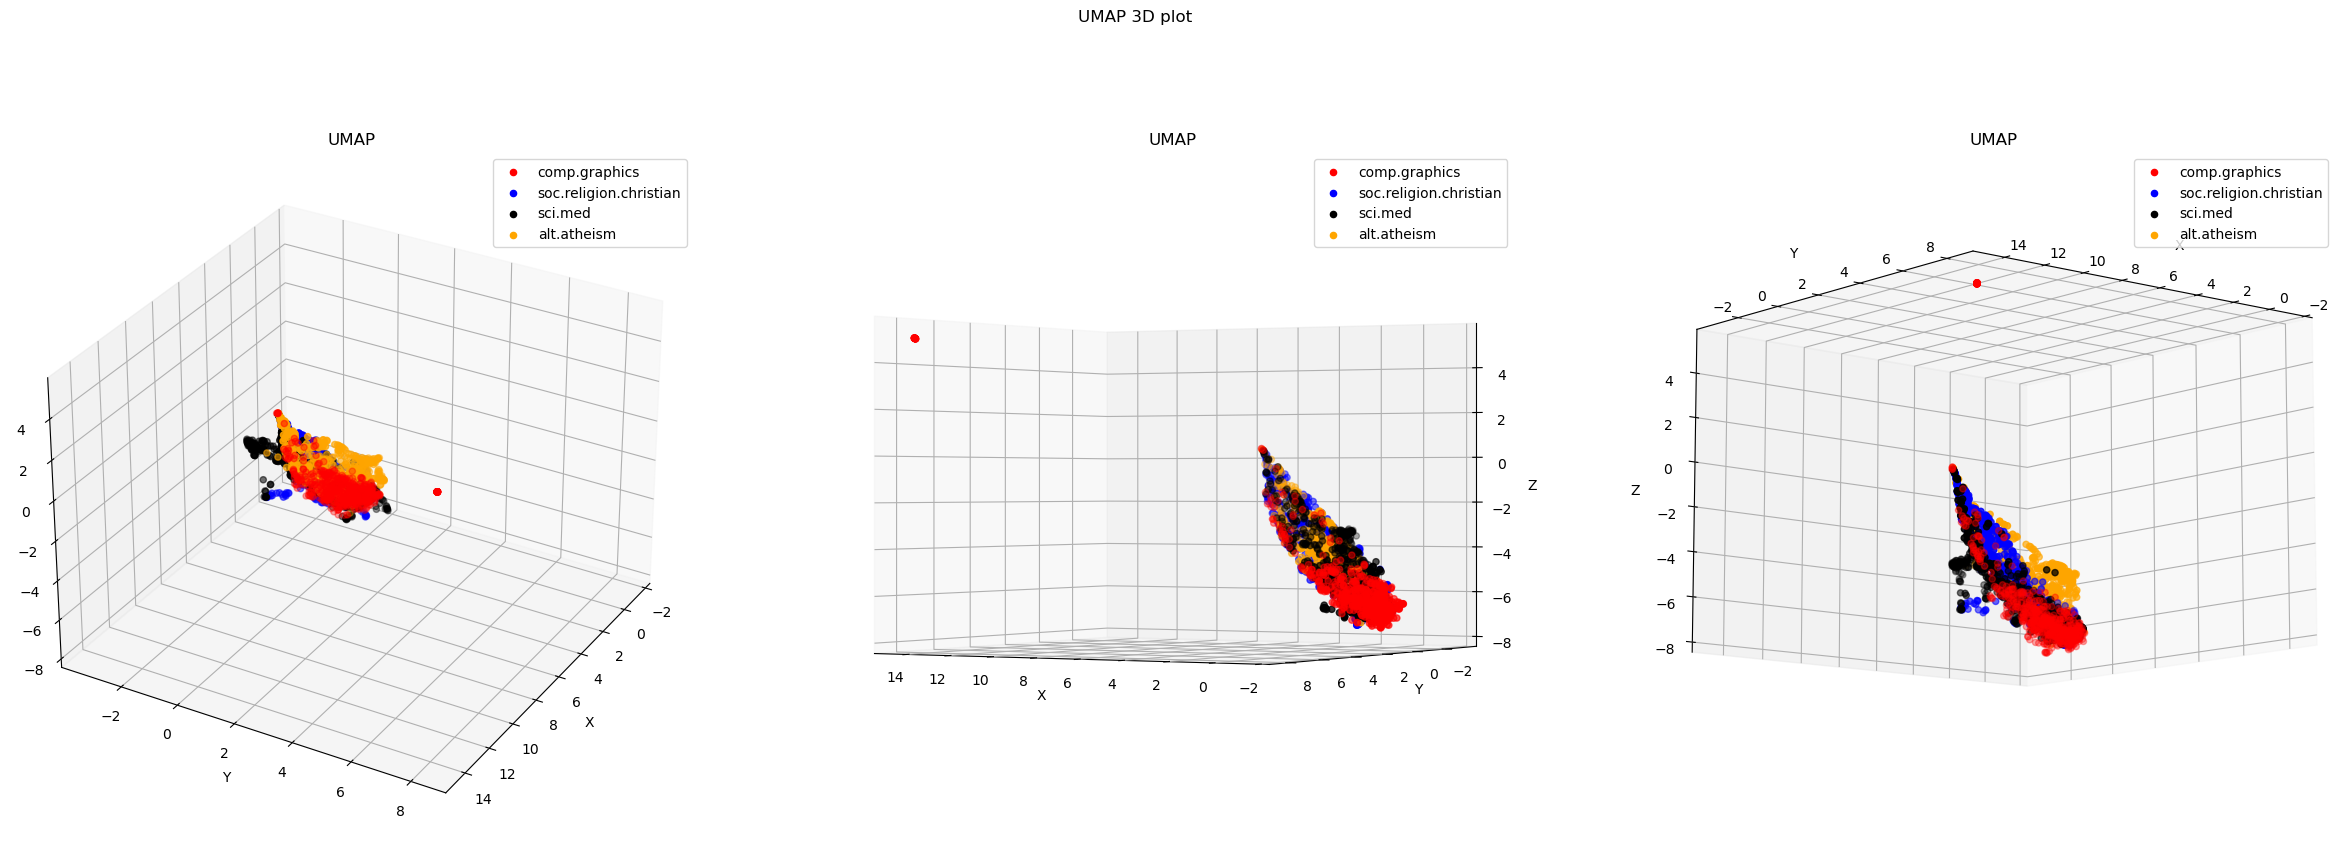

In [262]:
fig = plt.figure(figsize=(30, 10))
fig.suptitle('UMAP 3D plot')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_umap_aug, 'UMAP', elev=30, azim=30)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_umap_aug, 'UMAP', elev=0, azim=120)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP', elev=-10, azim=50)

plt.show()

In [224]:
'''
1. UMAP的分割看起來比PCA和t-SNE來得明顯
2. 從中間和右邊的角度看都有蠻明顯的分割點
'''

'\n1. UMAP的分割看起來比PCA和t-SNE來得明顯\n2. 從中間和右邊的角度看都有蠻明顯的分割點\n'

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [269]:
# Answer here
'''
一樣可以產生one-hot encoding的結果
'''
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[::200]

,text,category,category_name,unigrams,tokenized_text,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","{like, convert, Nntp-Posting-Host:, anyone, Su...","[0, 1, 0, 0]"
200,From: johnsd2@rpi.edu (Dan Johnson) Subject: R...,3,soc.religion.christian,"[From, :, johnsd2, @, rpi.edu, (, Dan, Johnson...","{>States, faith., for, 5, pass,, Undoubtably.,...","[0, 0, 0, 1]"
400,From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...,1,comp.graphics,"[From, :, nfotis, @, ntua.gr, (, Nick, C., Fot...","{domain, accepts, for, Denver,, 05446, 360-29-...","[0, 1, 0, 0]"
600,"From: ""Robert Knowles"" <p00261@psilink.com> Su...",0,alt.atheism,"[From, :, ``, Robert, Knowles, '', <, p00261, ...","{principles., 5, Nntp-Posting-Host:, word, use...","[1, 0, 0, 0]"
800,From: JJMARVIN@pucc.princeton.edu Subject: pra...,3,soc.religion.christian,"[From, :, JJMARVIN, @, pucc.princeton.edu, Sub...","{terms, for, marks, lose, relations, free, cut...","[0, 0, 0, 1]"
1000,From: bobs@thnext.mit.edu (Robert Singleton) S...,0,alt.atheism,"[From, :, bobs, @, thnext.mit.edu, (, Robert, ...","{faith., for, frame, word, existed., >position...","[1, 0, 0, 0]"
1200,From: eliezer@physics.llnl.gov (David A Elieze...,2,sci.med,"[From, :, eliezer, @, physics.llnl.gov, (, Dav...","{like, for, imaging?, 25, along,, find, Photon...","[0, 0, 1, 0]"
1400,From: r0506048@cml3 (Chun-Hung Lin) Subject: R...,1,comp.graphics,"[From, :, r0506048, @, cml3, (, Chun-Hung, Lin...","{width, JPG, ªL«T§», Nntp-Posting-Host:, descr...","[0, 1, 0, 0]"
1600,From: healta@saturn.wwc.edu (Tammy R Healy) Su...,0,alt.atheism,"[From, :, healta, @, saturn.wwc.edu, (, Tammy,...","{like, for, NEVER, free, get, world,, didn't, ...","[1, 0, 0, 0]"
1800,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism,"[From, :, sandvik, @, newton.apple.com, (, Ken...","{Jesus, lunatic, thinks, process, didn't, So, ...","[1, 0, 0, 0]"


---

# Second: New Dataset

## 1. Data Preparation

In [113]:
import pandas as pd

df = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df.shape

(1500, 2)

In [114]:
df = df[['comment', 'sentiment']]

In [115]:
df

,comment,sentiment
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
...,...,...
1495,"i don't know!..but the opening of the video,.....",not nostalgia
1496,it's sad this is such a beautiful song when yo...,not nostalgia
1497,"Dear Friend, I think age and time is not that ...",not nostalgia
1498,I was born in 1954 and started to be aware of ...,nostalgia


---

## 2. Data Mining Using Pandas

### 2.1 Dealing with Missing Values

In [116]:
import helpers.data_mining_helpers as dmh

In [117]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,comment,sentiment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


從以上的結果可以看出資料中沒有缺失值

### 2.2 Dealing with Duplicate Data

In [118]:
sum(df.duplicated())

1

In [119]:
df.drop_duplicates(keep=False, inplace=True)

In [120]:
sum(df.duplicated())

0

In [121]:
df.shape

(1498, 2)

從以上結果可以看出資料中有兩筆相同的row，刪除相同的row後剩下1498筆資料

---

## 3. Data Preprocessing

### 3.1 Sampling

In [122]:
df_sample = df.sample(1000, random_state = 42)

In [151]:
temp_df = pd.DataFrame({'df':df.sentiment.value_counts(), 
                        'df_sample':df_sample.sentiment.value_counts()})
temp_df

,df,df_sample
nostalgia,750,488
not nostalgia,748,512


<Axes: title={'center': 'Category distribution'}>

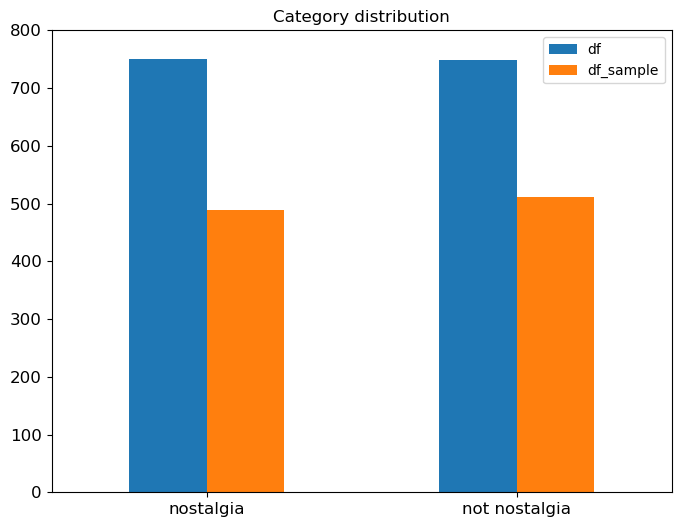

In [152]:
temp_df.plot(kind='bar',
       title='Category distribution',
       ylim=(0,800),
       rot = 0, 
       fontsize = 12, 
       figsize = (8,6),
       legend = ['df', 'df_sample'])

從上面的結果可以發現，sample後的兩個種類比例差不多，沒有類別不平衡的問題

### 3.2 Feature Creation

In [125]:
import nltk

In [126]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

In [127]:
df.head(5)

,comment,sentiment,unigrams
0,He was a singer with a golden voice that I lov...,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t..."
1,The mist beautiful voice ever I listened to hi...,nostalgia,"[The, mist, beautiful, voice, ever, I, listene..."
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,listening to his songs reminds me of my mum wh...,nostalgia,"[listening, to, his, songs, reminds, me, of, m..."


In [128]:
print(df.loc[0, 'unigrams'])

['He', 'was', 'a', 'singer', 'with', 'a', 'golden', 'voice', 'that', 'I', 'love', 'to', 'hear', 'all', 'the', 'time', '.', 'I', 'was', 'his', 'great', 'fan', 'at', 'the', 'age', 'of', '16years', 'in', 'those', 'days', 'and', 'still', 'now', '.', 'Although', 'we', 'have', 'many', 'singers', 'now', ',', 'but', ',', 'I', 'can', 'vouch', 'for', 'Jim', 'Reeves', 'all', 'the', 'time', '.', 'You', 'feel', 'relaxed', ',', 'emotional', 'and', 'loving', '.', 'Thank', 'you', 'Lord', 'for', 'his', 'life', '.']


### 3.3 Feature subset selection

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment)
print(df_counts.shape)
print(df_counts[1])

(1498, 3730)
  (0, 3570)	1
  (0, 3534)	2
  (0, 2028)	1
  (0, 3336)	1
  (0, 3284)	2
  (0, 1651)	1
  (0, 2341)	1
  (0, 258)	1
  (0, 3124)	1
  (0, 2186)	1
  (0, 410)	1
  (0, 1177)	1
  (0, 1983)	1
  (0, 1646)	1
  (0, 3610)	1
  (0, 1876)	1
  (0, 2976)	1
  (0, 2287)	1
  (0, 1358)	1
  (0, 256)	1
  (0, 259)	1


In [130]:
count_vect.get_feature_names_out()[-10:]

array(['yours', 'yourself', 'youth', 'youthful', 'youtube', 'yrs', 'yuo',
       'yup', 'zealand', 'zulus'], dtype=object)

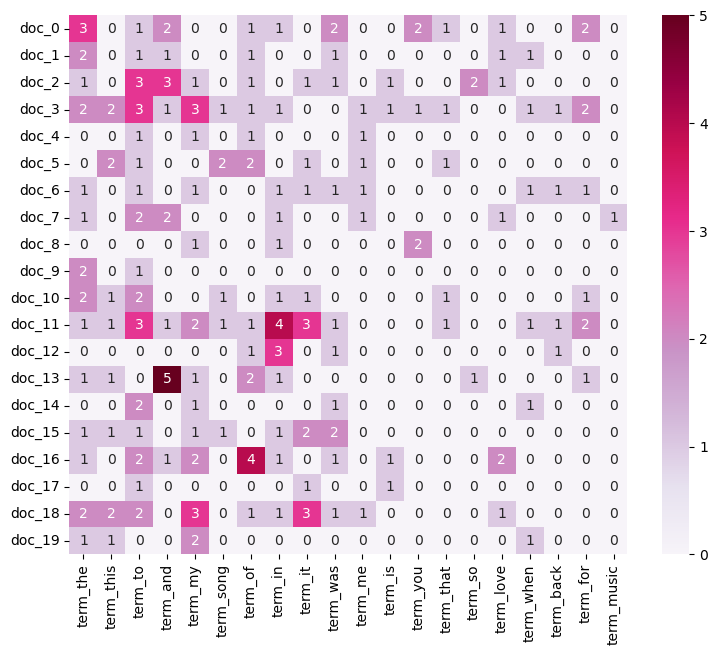

In [131]:
import seaborn as sns
top_20_frequence_terms_index = np.argsort(-np.asarray(df_counts.sum(axis=0))[0])[0:20] # 先找出前20多出現次數的index
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_20_frequence_terms_index]] # 利用前面找出的index找出那些字
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]] # 看前面20個document
plot_z = df_counts[0:20, top_20_frequence_terms_index].toarray() # 找出前20個document出現整個文件前20多出現次數的字的次數

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                cmap="PuRd",
                annot=True)

從上面的heatmap可以看出在前20個文件中，整份文件出現次數最多的20個字的分布狀況

### 3.4 Attribute Transformation / Aggregation

In [132]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [133]:
temp_df = pd.DataFrame(data={
    'terms': count_vect.get_feature_names_out()[top_20_frequence_terms_index],
    'frequencies': term_frequencies[top_20_frequence_terms_index]
})

In [134]:
fig = px.bar(temp_df, x = 'terms', y = 'frequencies', log_y = True)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.update_xaxes(tickangle=270)
fig.show()

從上面的圖可以看出出現次數前20多的字的次數分布狀況

以下是創建term-document DataFrame並過濾掉前5%和後1%的字 

In [135]:
def create_filtered_term_document_df(df, sentiment, top_percent=0.05, bottom_percent=0.01):
    
    # 篩選是nostalgia還是not nostalgia的df
    filtered_df = df[df['sentiment'] == sentiment]
    
    # 創建term-document DataFrame
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(filtered_df['comment'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    # 過濾掉前5%和後1%的字 
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words in {sentiment}: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words in {sentiment}: \n{sorted_words.tail(top_n)}')
    
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {
    'nostalgia': create_filtered_term_document_df(df, sentiment='nostalgia'),
    'not nostalgia': create_filtered_term_document_df(df, sentiment='not nostalgia')
}

Bottom 1.0% words in nostalgia: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row            1
ronnie         1
rpg            1
ruined         1
rules          1
running        1
sadder         1
saddest        1
glimpses       1
safer          1
rubbish        1
grabbed        1
grace          1
romanticism    1
rightly        1
dtype: int64
Top 5.0% words in nostalgia: 
takes         30
little        30
singing       31
wonderful     31
makes         31
            ... 
and          472
to           543
this         545
my           566
the          643
Length: 114, dtype: int64
Bottom 1.0% words in not nostalgia: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone     

In [136]:
term_document_dfs['nostalgia'] 

,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
from PAMI.extras.convert.DF2DB import DF2DB
obj = DF2DB(term_document_dfs['nostalgia'])
obj.convert2TransactionalDatabase('td_freq_db_nostalgia.csv', '>=', 1)

obj = DF2DB(term_document_dfs['not nostalgia'])
obj.convert2TransactionalDatabase('td_freq_db_not_nostalgia.csv', '>=', 1)

'td_freq_db_not_nostalgia.csv'

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


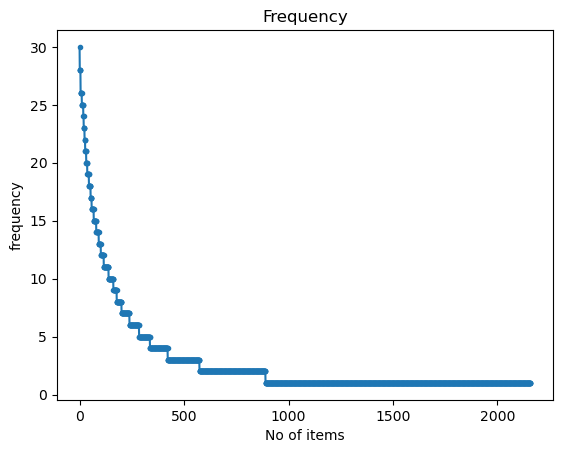

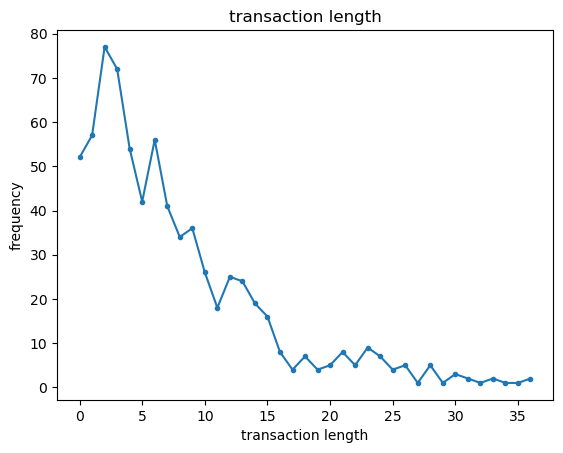

In [138]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


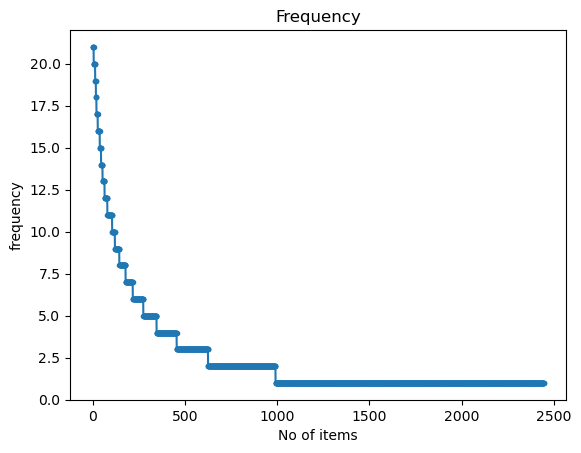

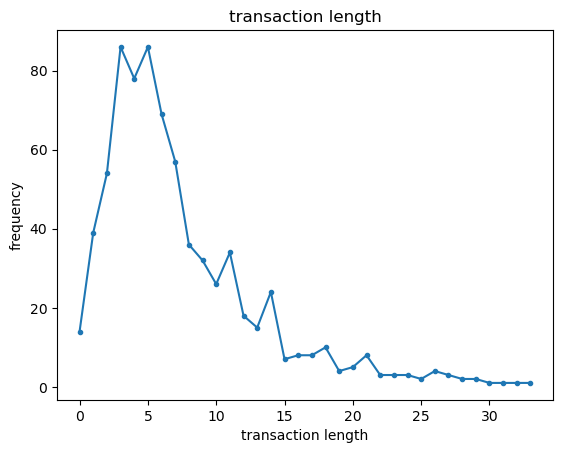

In [139]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

從上面的分析可以發現有蠻多transaction的長度都不長，所以將minSup設得比較小

In [140]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=2
obj = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_nostalgia= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3805
Runtime: 0.04752659797668457


In [141]:
obj.save('freq_patterns_nostalgia_minSup2.txt') #save the patterns
frequentPatternsDF_nostalgia

,Patterns,Support
0,gentle,2
1,gentle no,2
2,jesus,2
3,jesus town,2
4,job,2
...,...,...
3800,will,28
3801,will go,2
3802,will favorite,3
3803,go,28


In [142]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=2
obj = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj.mine()
frequentPatternsDF_not_nostalgia= obj.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2127
Runtime: 0.035707950592041016


In [143]:
obj.save('freq_patterns_not_nostalgia_minSup2.txt') #save the patterns
frequentPatternsDF_not_nostalgia

,Patterns,Support
0,lord,2
1,relaxed,2
2,2nd,2
3,2nd came,2
4,marry,2
...,...,...
2122,loved,21
2123,them,21
2124,them every,4
2125,lyrics,21


篩選出只在nostalgia或只在not nostalgia中出現的patterns

In [144]:
patterns_nostalgia = set(frequentPatternsDF_nostalgia['Patterns'])
patterns_not_nostalgia = set(frequentPatternsDF_not_nostalgia['Patterns'])

# 找到只出現在一個 dataframe 中的 pattern
unique_patterns_nostalgia = patterns_nostalgia - patterns_not_nostalgia
unique_patterns_not_nostalgia = patterns_not_nostalgia - patterns_nostalgia
unique_patterns = unique_patterns_nostalgia.union(unique_patterns_not_nostalgia)

# 計算丟棄的patterns數量
total_patterns_count = len(frequentPatternsDF_nostalgia) + len(frequentPatternsDF_not_nostalgia)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# 篩選兩個dataframe中的pattern只保留unique patterns
filtered_nostalgia_df = frequentPatternsDF_nostalgia[frequentPatternsDF_nostalgia['Patterns'].isin(unique_patterns)]
filtered_not_nostalgia_df = frequentPatternsDF_not_nostalgia[frequentPatternsDF_not_nostalgia['Patterns'].isin(unique_patterns)]

# 合併篩選後的dataframe並依support大小排序
final_pattern_df = pd.concat([filtered_nostalgia_df, filtered_not_nostalgia_df], ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# 顯示結果
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

            Patterns  Support
3287            will       28
3284           would       28
3283            ever       28
3268            such       26
3279            wish       26
...              ...      ...
1752    together has        2
1753  together other        2
1754    together see        2
1755     along going        2
2451         rip jim        2

[4902 rows x 2 columns]
Number of patterns discarded: 1030


將pattern與term_document matrix合併

In [145]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])
terms = count_vect.get_feature_names_out()

df['tokenized_comment'] = df['comment'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

pattern_matrix = pd.DataFrame(
    {
        pattern: df['tokenized_comment'].apply(lambda x: int(pattern_words.issubset(x)))
        for pattern in final_pattern_df['Patterns']
        for pattern_words in [set(pattern.split())]
    }
)

tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)

augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,record left home,left about,left us too,left karen,together along,together has,together other,together see,along going,rip jim
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.5 Dimensionality Reduction

利用term_document的dataframe做降維

In [146]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

df_pca_tdm = PCA(n_components=2, random_state=42).fit_transform(tdm_df.values)
df_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(tdm_df.values)
df_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(tdm_df.values)

c:\Users\Rex\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



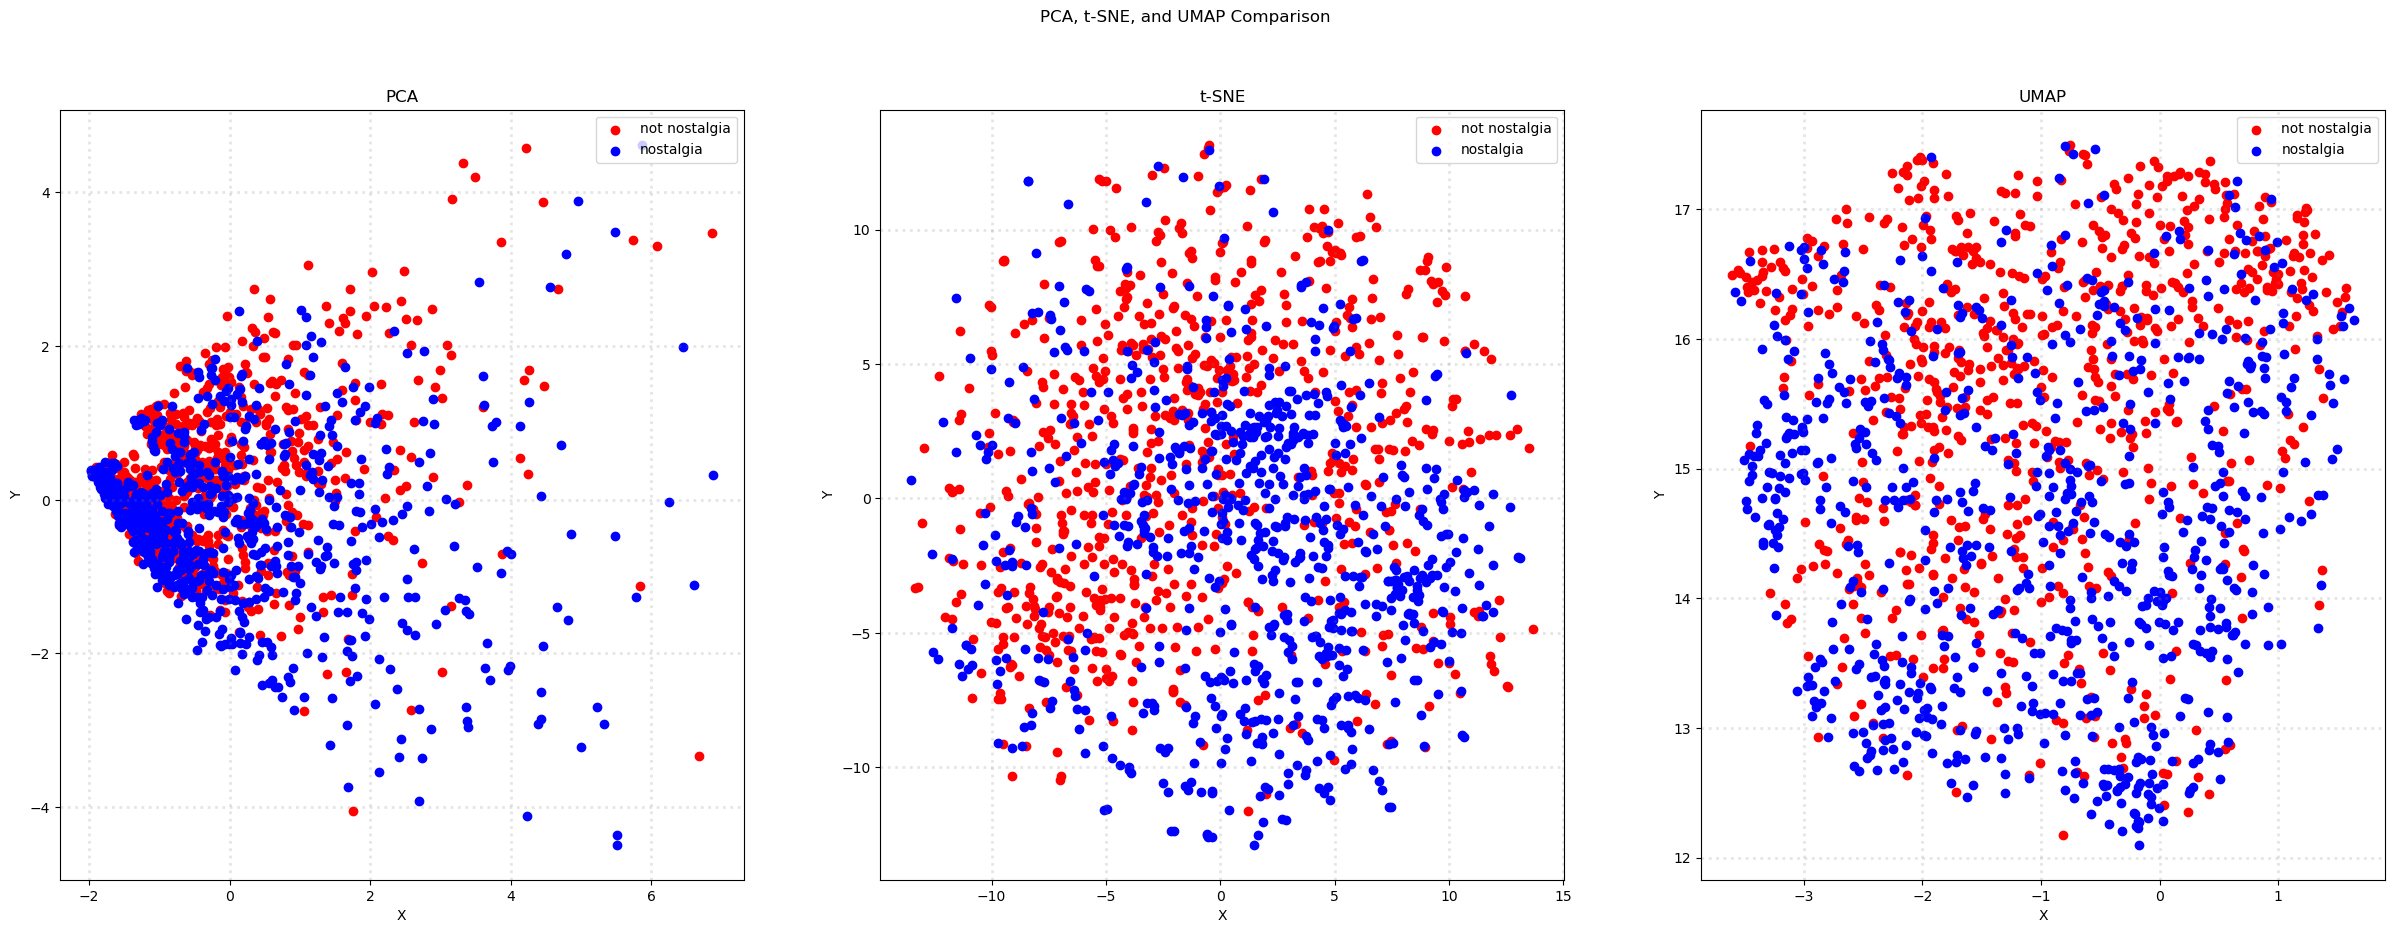

In [147]:
col = ['red', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

利用augmented_df再做另一次降維

In [148]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

df_pca_tdm = PCA(n_components=2, random_state=42).fit_transform(augmented_df.values)
df_tsne_tdm = TSNE(n_components=2, random_state=42).fit_transform(augmented_df.values)
df_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(augmented_df.values)

c:\Users\Rex\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



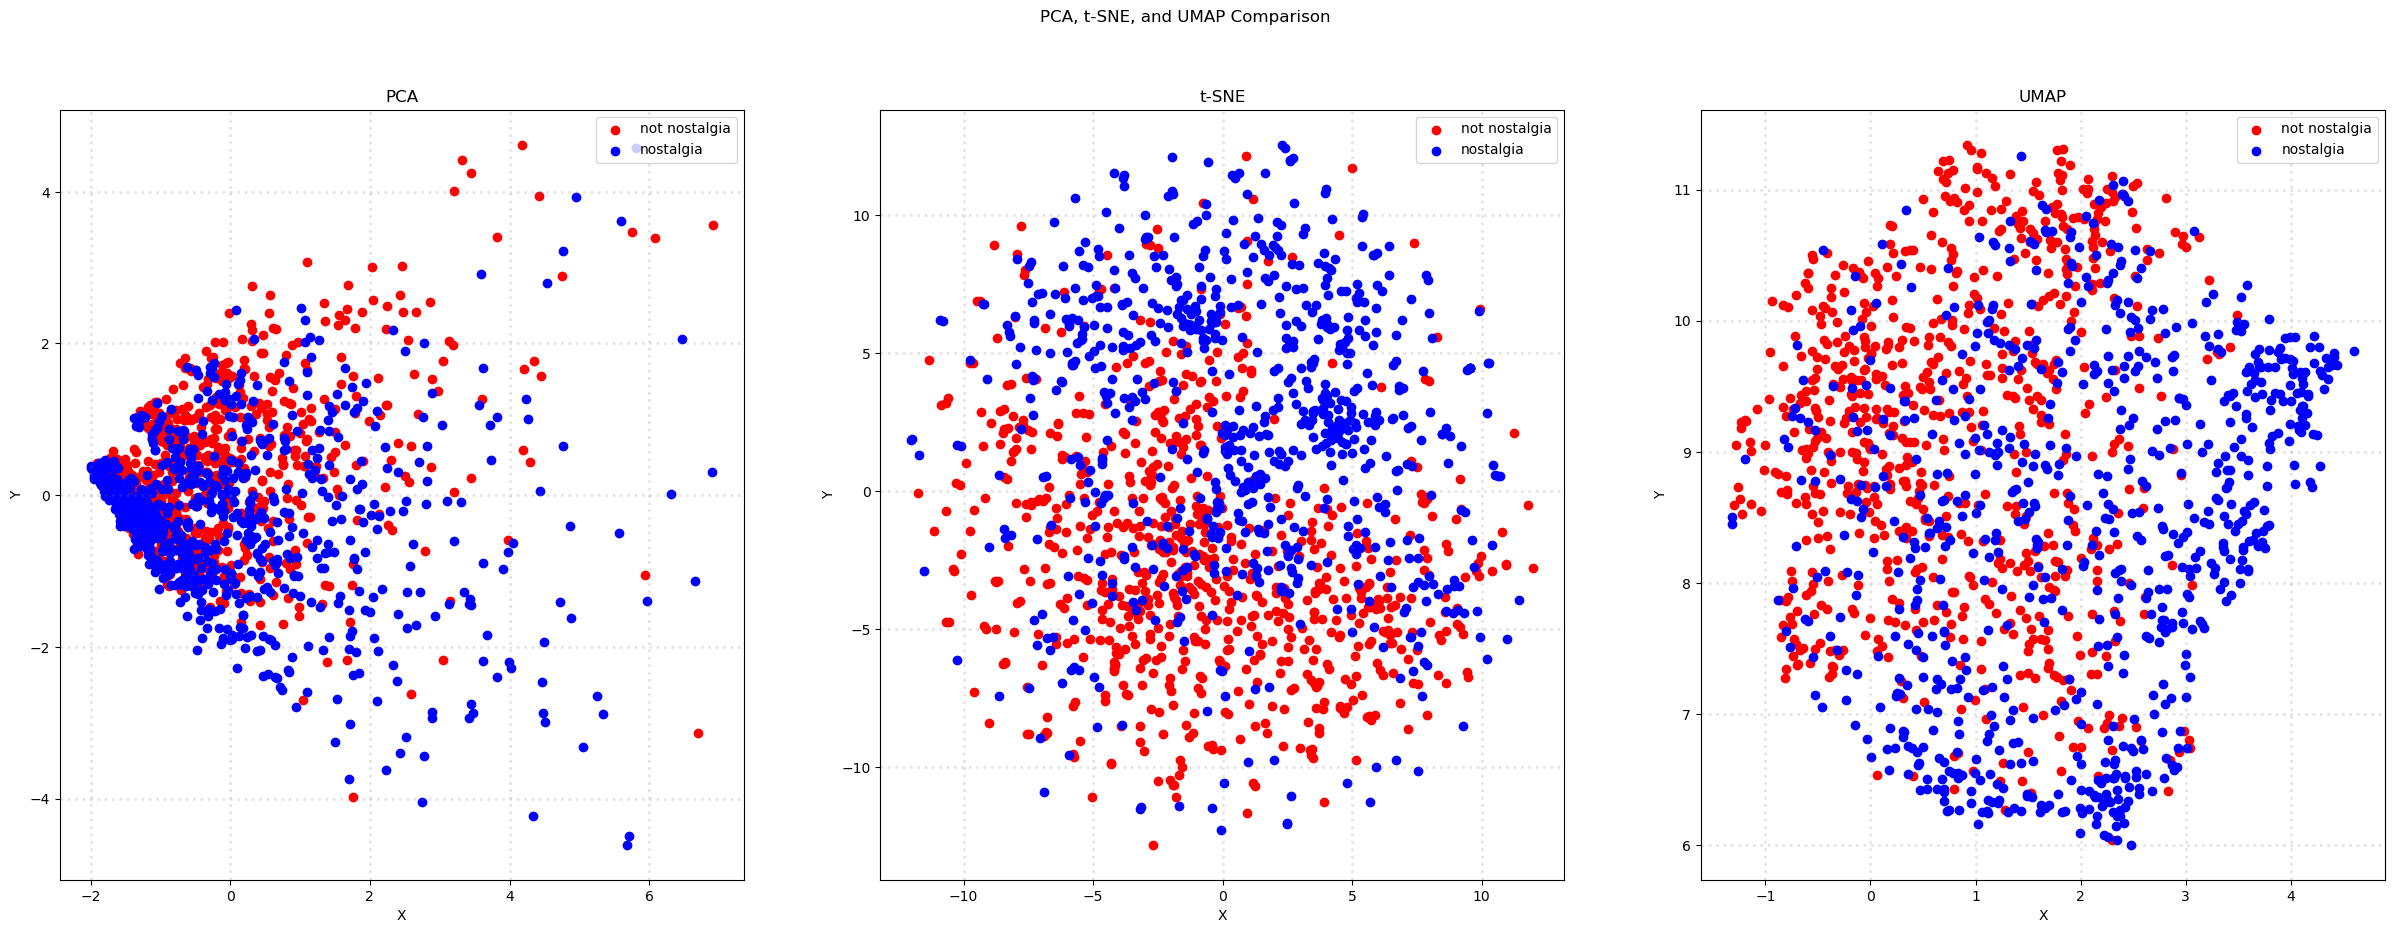

In [149]:
col = ['red', 'blue']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], df_pca_tdm, 'PCA')
plot_scatter(axes[1], df_tsne_tdm, 't-SNE')
plot_scatter(axes[2], df_umap_tdm, 'UMAP')

plt.show()

比較單純的term_document與加入unique patter的augment_df，可以看出PCA並沒有太大的差別；t-SNE感覺有比較好一些，但比較像是鏡像反轉；UMAP在分類的效果上有明顯的提升

### 3.6 Discretization and Binarization

In [171]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)
df['bin_sentiment'] = mlb.transform(df['sentiment'])

In [172]:
df.head(5)

,comment,sentiment,unigrams,tokenized_comment,bin_sentiment
0,He was a singer with a golden voice that I lov...,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t...","{that, his, I, Although, and, time., vouch, fo...",1
1,The mist beautiful voice ever I listened to hi...,nostalgia,"[The, mist, beautiful, voice, ever, I, listene...","{ever, him, his, I, The, and, Never, when, lis...",0
2,I have most of Mr. Reeves songs. Always love ...,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{his, grew, I, were, forgot, and, most, like, ...",0
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{that, 47, I, convince, and, who, leave, ""marr...",1
4,listening to his songs reminds me of my mum wh...,nostalgia,"[listening, to, his, songs, reminds, me, of, m...","{him, reminds, his, played, who, me, everyday,...",0


---

## 4. Data Exploration

利用cosine_similarity計算不同document是否相似

In [160]:
document_to_transform_1 = []
document_to_transform_1.append(df.loc[50, 'comment'])
document_to_transform_2 = []
document_to_transform_2.append(df.loc[100, 'comment'])
document_to_transform_3 = []
document_to_transform_3.append(df.loc[150, 'comment'])

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [161]:
from sklearn.preprocessing import binarize

document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [162]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


---

## 5. Data Classification

利用MultinomialNB分類，並將train/test切成70/30

In [173]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(df[['bin_sentiment', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(tdm_df, df['bin_sentiment'], test_size=0.3, random_state=42)

In [174]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8286    0.9486    0.8845       214
not nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



再利用augmented_df分類一次

In [177]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

category_mapping = dict(df[['bin_sentiment', 'sentiment']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['bin_sentiment'], test_size=0.3, random_state=42)

In [178]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8690    0.9299    0.8984       214
not nostalgia     0.9321    0.8729    0.9015       236

     accuracy                         0.9000       450
    macro avg     0.9006    0.9014    0.9000       450
 weighted avg     0.9021    0.9000    0.9001       450



從上面可以看到利用增加unique pattern欄位的augmented_df，讓分類的準確度從0.88提升到0.9

# Fourth: Improvement

1. 因為這個資料集中的類別只有兩種，所以大部份的時候不需要像Master利用迴圈並將不同類別的dataframe儲存在dict或list中，在只有兩種類別的情況下，直接用成兩個dataframe比較清楚易懂。

2. 我將創建term-document DataFrame與之後過濾掉前5%和後1%的字的兩個函式合併成一個，可以直接利用那個函式產生term-document DataFrame並設定域值過濾掉不需要的字。

3. 在5.4中計算unique pattern的時候，因為資料集類別只有兩種，所以可以直接用差集合的運算方式找出unique pattern，不需要像Master中計算pattern出現的次數。

4. 在產生augmented_df中有一串程式碼需要iterate好幾次，且需要用好幾次apply，需要執行的時間較長，調整成dict comprehension的方式速度比較快

5. 在3.6 encode的地方，因為只有兩種，所以不需要tolist()，直接產生0或1